# Requirement Module

In [ ]:
!pip install rasterio
!pip install matplotlib
!pip install fiona
!pip install geopandas
!pip install shapely

In [ ]:
import rasterio
from rasterio.mask import mask
from rasterio.transform import rowcol
import geopandas as gpd
from shapely.geometry import box
import fiona
import pandas as pd
import matplotlib.pyplot as plt

# Understand what's in tif and how it stores data
## recommend :  make sure you understand what different metadatas mean

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 40000, 'height': 40000, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.00025, 0.0, -80.0,
       0.0, -0.00025, 50.0), 'blockxsize': 40000, 'blockysize': 1, 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}


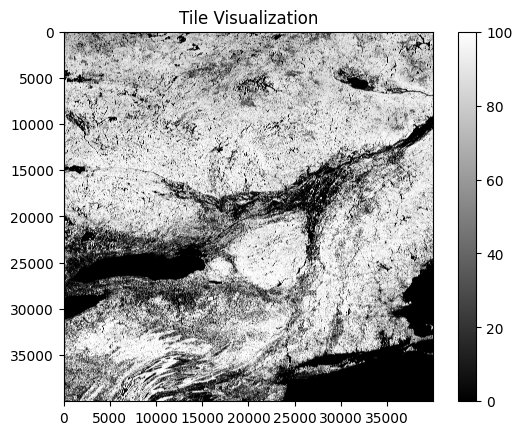

In [ ]:
tif_path = 'Hansen_GFC-2023-v1.11_treecover2000_50N_080W.tif'
with rasterio.open(tif_path) as src:
    print(src.profile)
    tile = src.read(1)

plt.imshow(tile, cmap='gray')
plt.colorbar()
plt.title("Tile Visualization")
plt.show()

# Understand what's in gpkg and how it stores data

In [ ]:
gdf = gpd.read_file('4GLTE_mobile_broadband_sep2024.gpkg')

print(gdf.crs)

gdf = gdf.to_crs(epsg=4326)


EPSG:4326


## recommend :  make sure you understand what is layer

In [ ]:
layers = fiona.listlayers('4GLTE_mobile_broadband_sep2024.gpkg')
print(f"There are {len(layers)} layers in this GeoPackage file")
print("Layer names:", layers)

There are 1 layers in this GeoPackage file
Layer names: ['bdc_36_131425_4GLTE_mobile_broadband_h3_D23_03sep2024']


## recommend :  make sure you understand what different column mean

In [ ]:
gdf = gpd.read_file('4GLTE_mobile_broadband_sep2024.gpkg', layer='bdc_36_131425_4GLTE_mobile_broadband_h3_D23_03sep2024')

print(gdf.head())

          frn  providerid brandname  technology  mindown  minup  minsignal  \
0  0018506568      131425   Verizon         400      5.0    1.0        -80   
1  0018506568      131425   Verizon         400      5.0    1.0        -80   
2  0018506568      131425   Verizon         400      5.0    1.0        -80   
3  0018506568      131425   Verizon         400      5.0    1.0        -90   
4  0018506568      131425   Verizon         400      5.0    1.0        -80   

   environmnt       h3_res9_id  \
0           1  892a100002fffff   
1           1  892a100004bffff   
2           1  892a100005bffff   
3           1  892a1000063ffff   
4           1  892a1000067ffff   

                                            geometry  
0  POLYGON ((-73.78162 40.8496, -73.77945 40.8487...  
1  POLYGON ((-73.79708 40.86244, -73.79491 40.861...  
2  POLYGON ((-73.79503 40.86514, -73.79286 40.864...  
3  POLYGON ((-73.79038 40.85467, -73.7882 40.8538...  
4  POLYGON ((-73.78814 40.85208, -73.78597 40.851..

In [ ]:
print(gdf.columns)

Index(['frn', 'providerid', 'brandname', 'technology', 'mindown', 'minup',
       'minsignal', 'environmnt', 'h3_res9_id', 'geometry'],
      dtype='object')


## recommend : understand what POLYGON ((-73.78162 40.8496, -73.77945 40.84877, -73.77939 40.84701, -73.7815 40.84608, -73.78367 40.8469, -73.78373 40.84867, -73.78162 40.8496)) mean

Here is from GPT:

POLYGON is a type of geometry used in GIS (Geographic Information Systems) to represent an area enclosed by a series of points (or vertices). These points are defined by their geographic coordinates (longitude, latitude) and are connected in the order provided to form a closed shape. The first and last points must be the same to close the shape.

-73.78162 40.8496:
-73.78162 represents the longitude, and 40.8496 represents the latitude. This is one of the points on the polygon. In this case, it is a point located in the western hemisphere (negative longitude) and in the northern hemisphere (positive latitude).

-73.77945 40.84877:
This is another point on the polygon, slightly east of the first point, as indicated by the smaller magnitude of the longitude.

-73.77939 40.84701:
This point continues to define the boundary of the polygon, located


In [ ]:
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)

print(gdf['geometry'])

0             POLYGON ((-73.78162 40.8496, -73.77945 40.84877, -73.77939 40.84701, -73.7815 40.84608, -73.78367 40.8469, -73.78373 40.84867, -73.78162 40.8496))
1         POLYGON ((-73.79708 40.86244, -73.79491 40.86162, -73.79485 40.85985, -73.79696 40.85892, -73.79913 40.85975, -73.79919 40.86151, -73.79708 40.86244))
2          POLYGON ((-73.79503 40.86514, -73.79286 40.86432, -73.7928 40.86255, -73.79491 40.86162, -73.79708 40.86244, -73.79714 40.86421, -73.79503 40.86514))
3          POLYGON ((-73.79038 40.85467, -73.7882 40.85385, -73.78814 40.85208, -73.79025 40.85115, -73.79243 40.85198, -73.79249 40.85374, -73.79038 40.85467))
4         POLYGON ((-73.78814 40.85208, -73.78597 40.85126, -73.78591 40.84949, -73.78802 40.84856, -73.79019 40.84939, -73.79025 40.85115, -73.78814 40.85208))
                                                                                   ...                                                                          
925570     POLYGON ((-76.29312 44.

<Axes: >

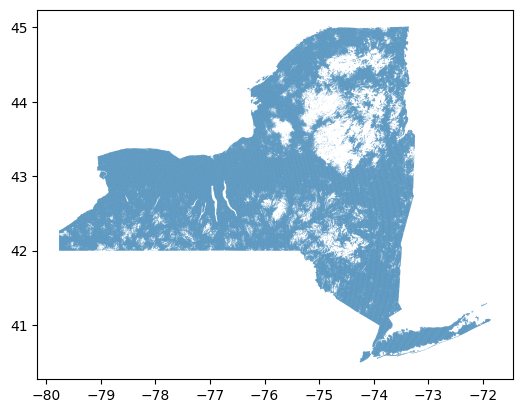

In [ ]:
# this part is not necessary
gdf.plot()

# Mapping two dataset:
What I do is split the TIFF image into sections using the area of each POLYGON in the GPKG file, then store those sections in an array. I also match the mindown values from the GPKG file to each cropped section, so they line up in a separate array.

**IMPORTANT: It is just an example how you match your data, see what you can do in the last part.**

In [ ]:
''' We've already done these above
gdf = gpd.read_file('4GLTE_mobile_broadband_sep2024.gpkg')

tif_path = 'Hansen_GFC-2023-v1.11_treecover2000_50N_080W.tif'
'''

with rasterio.open(tif_path) as src:
    # Initialize arrays to store the images and corresponding mindown values
    image_array = []
    mindown_array = []

    # Get the geographic bounds of the TIFF file
    # THINK : what does tiff_bounds store
    tiff_bounds = box(src.bounds.left, src.bounds.bottom, src.bounds.right, src.bounds.top)

    # IMPORTANT : It's just a example of how u mapping two dataset, I only process the first 10 rows from gdf
    for i in range(10):
        row = gdf.iloc[i]
        polygon = row['geometry']
        mindown = row['mindown']

        # Check if the polygon is within the TIFF bounds
        if polygon.within(tiff_bounds):
            # Crop the image based on the polygon
            try:
                out_image, out_transform = mask(src, [polygon], crop=True)

                # Store the cropped image and mindown value
                image_array.append(out_image)
                mindown_array.append(mindown)

            except Exception as e:
                print(f"Error processing polygon at index {i}: {e}")
        else:
            print(f"Polygon at index {i} is out of TIFF bounds, skipping.")

# Confirm the processing result
print(f"Processed {len(image_array)} polygons successfully.")



Processed 10 polygons successfully.


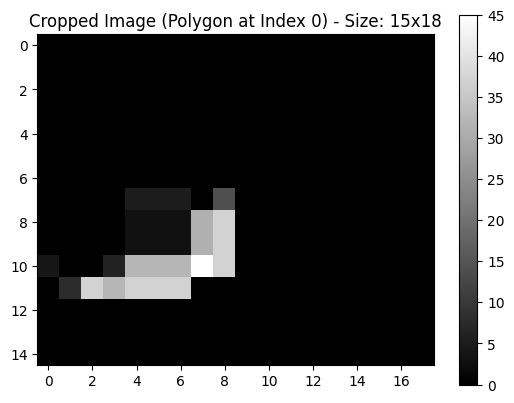

mindown value for polygon at index 0: 5.0
Image size (bands, height, width): (1, 15, 18)


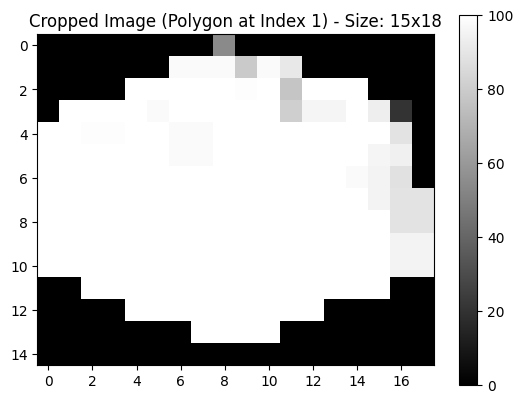

mindown value for polygon at index 1: 5.0
Image size (bands, height, width): (1, 15, 18)


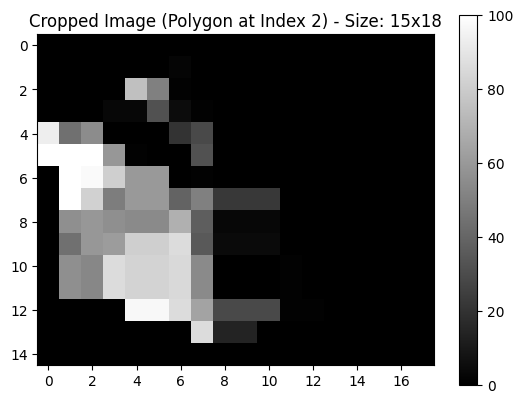

mindown value for polygon at index 2: 5.0
Image size (bands, height, width): (1, 15, 18)


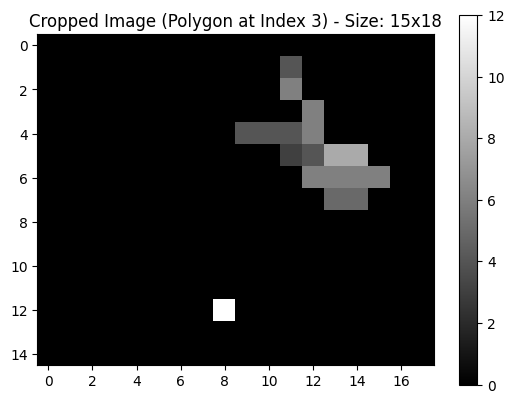

mindown value for polygon at index 3: 5.0
Image size (bands, height, width): (1, 15, 18)


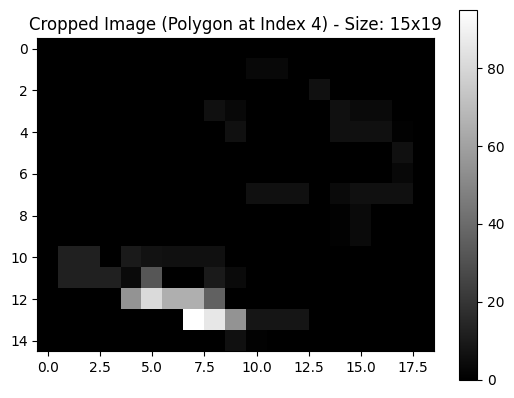

mindown value for polygon at index 4: 5.0
Image size (bands, height, width): (1, 15, 19)


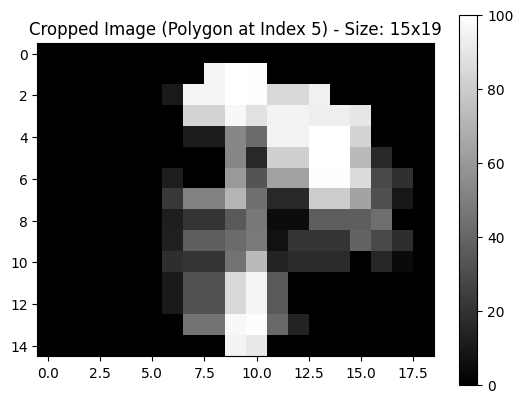

mindown value for polygon at index 5: 5.0
Image size (bands, height, width): (1, 15, 19)


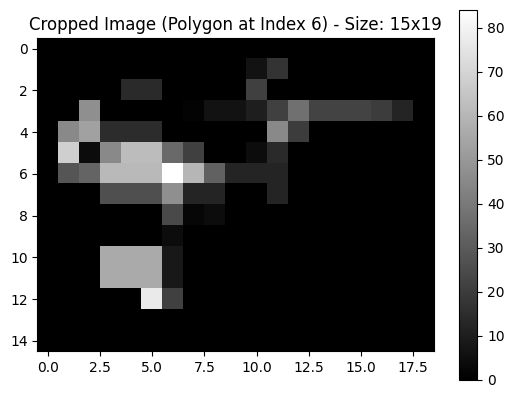

mindown value for polygon at index 6: 5.0
Image size (bands, height, width): (1, 15, 19)


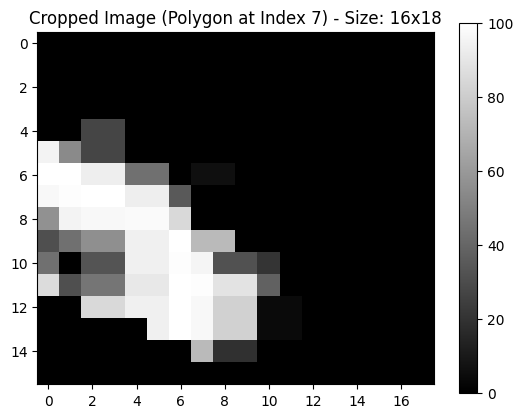

mindown value for polygon at index 7: 5.0
Image size (bands, height, width): (1, 16, 18)


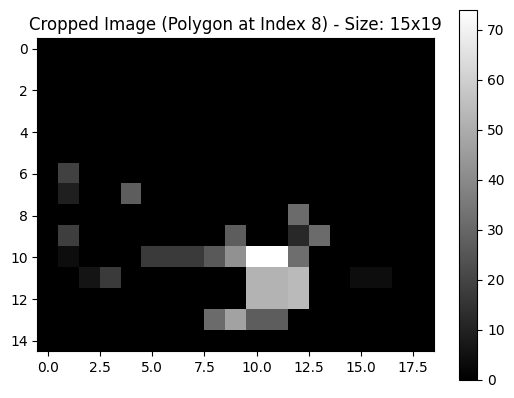

mindown value for polygon at index 8: 5.0
Image size (bands, height, width): (1, 15, 19)


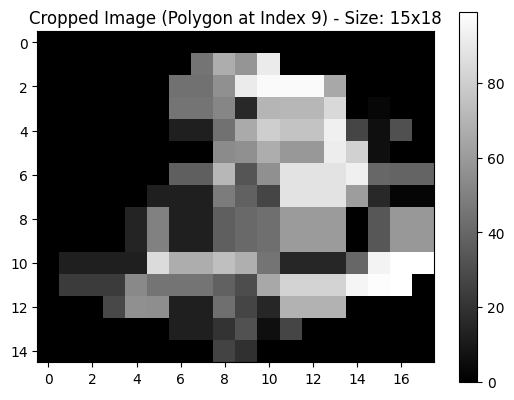

mindown value for polygon at index 9: 5.0
Image size (bands, height, width): (1, 15, 18)


In [ ]:
# Check if there are any cropped images
if len(image_array) > 0:
    # IMPORTANT : It's just a example of how u mapping two dataset, I only process the first 10 rows from gdf
    for i in range(min(10, len(image_array))):
        # Get the current image dimensions
        image_shape = image_array[i].shape  # (bands, height, width)

        # Display the cropped image
        plt.imshow(image_array[i][0], cmap='gray')  # Show the first band only
        plt.title(f"Cropped Image (Polygon at Index {i}) - Size: {image_shape[1]}x{image_shape[2]}")
        plt.colorbar()
        plt.show()

        # Print the corresponding mindown value and image size
        print(f"mindown value for polygon at index {i}: {mindown_array[i]}")
        print(f"Image size (bands, height, width): {image_shape}")
else:
    print("No images to display. The polygons may be out of bounds or an error occurred.")


# Issue :
**i'm not sure** with an image size of 15x18, and some areas containing nodata, is it possible to train a model using this kind of image data to predict mindown effectively

If it doesn't work.
You can merge multiple neighboring polygons to create a larger area, then crop the image based on these combined regions. At the same time, you can average the mindown values from the merged polygons to get an average mindown for the combined area.This is just one possible method to consider.

### ***Last but not least, this is just an example of how I would match two datasets. I used the image as my feature and mindown as my target. You can generate features that fit your needs. For example, you could optimize the image by dealing with ondata area or you could analyze the image first or even use a model to convert the image into more features, like continuous or categorical data, before predicting the target. As for the target, I just picked mindown as an example. You don’t have to use mindown—you could even have multiple targets.***